In [1]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.1'

In [26]:
filepath = "./input_data/greater_boston_road.graphml"
#ox.save_graphml(G, filepath)
G = ox.load_graphml(filepath)

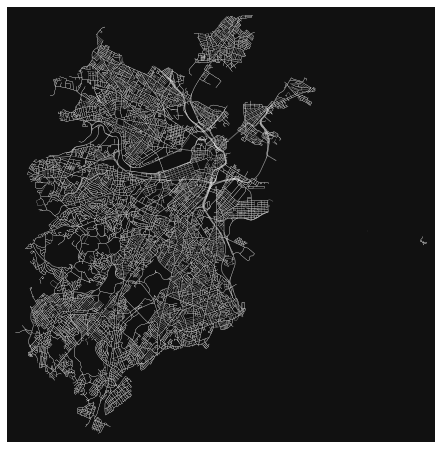

In [27]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [28]:
filepath2 = "./input_data/greater_boston_walk.graphml"
#ox.save_graphml(G, filepath)
G2 = ox.load_graphml(filepath)

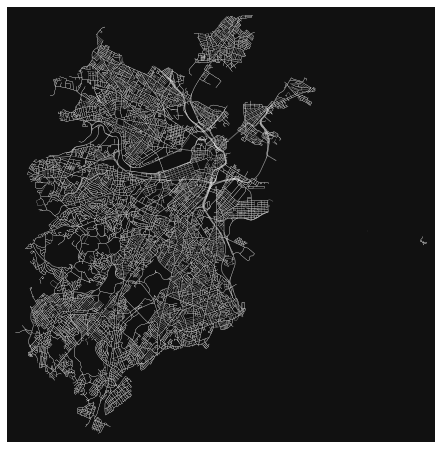

In [29]:
fig, ax = ox.plot_graph(G2, node_size=0, edge_color="w", edge_linewidth=0.2)

In [30]:
for node, data in G.nodes(data=True):
    if 'osmid' in data:
        data['osmid_original'] = data.pop('osmid')

In [31]:
G_proj=ox.project_graph(G)
ox.save_graph_shapefile(G_proj, filepath="./data/boston_road.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [32]:
G3 = gpd.read_file("./data/boston_road.shp")

<AxesSubplot:>

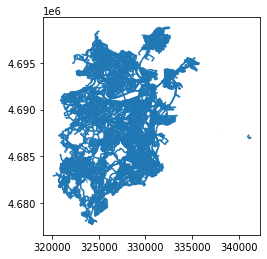

In [33]:
G3.plot()

In [34]:
for node, data in G2.nodes(data=True):
    if 'osmid' in data:
        data['osmid_original'] = data.pop('osmid')

In [35]:
G_proj=ox.project_graph(G2)
ox.save_graph_shapefile(G_proj, filepath="./data/boston_walk.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [17]:
places = [
    {"city": "Arlington", "state": "Massachusetts"},
    {"city": "Boston", "state": "Massachusetts"},
    {"city": "Brookline", "state": "Massachusetts"},
    {"city": "Cambridge", "state": "Massachusetts"},
    {"city": "Chelsea", "state": "Massachusetts"},
    {"city": "Everett", "state": "Massachusetts"},
    {"city": "Newton", "state": "Massachusetts"},
    {"city": "Revere", "state": "Massachusetts"},
    {"city": "Salem", "state": "Massachusetts"},
    {"city": "Somerville", "state": "Massachusetts"},
    {"city": "Watertown", "state": "Massachusetts"}
]

In [18]:
G = ox.graph_from_place(places, network_type="drive")

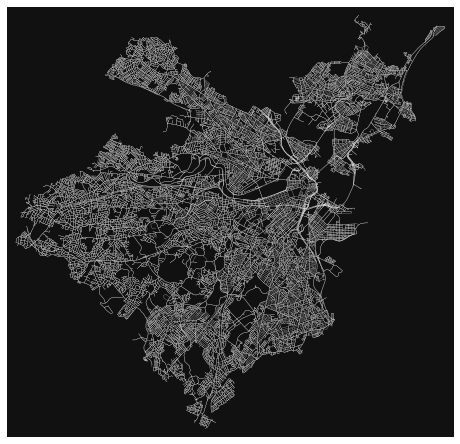

In [19]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

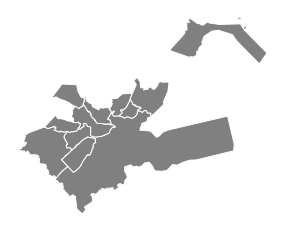

In [20]:
gdf = ox.geocode_to_gdf(places)
gdf_proj = ox.project_gdf(gdf)
ax = gdf_proj.plot(fc="gray", ec="w")
_ = ax.axis("off")

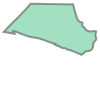

In [23]:
gdf.loc[0,'geometry']

In [25]:
gdf.to_file('greater-boston-boundary')

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [36]:
place ={"city": "Cambridge", "state": "Massachusetts"}
G_cambridge = ox.graph_from_place(place, network_type="drive")

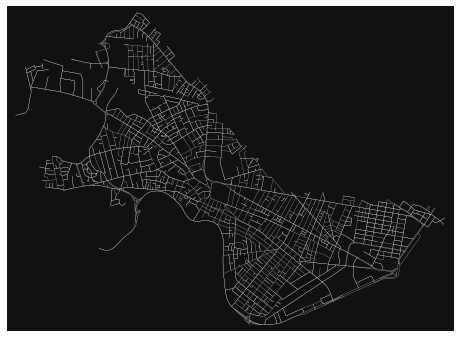

In [37]:
fig, ax = ox.plot_graph(G_cambridge, node_size=0, edge_color="w", edge_linewidth=0.2)

In [40]:
G_c_proj=ox.project_graph(G_cambridge)
ox.save_graph_shapefile(G_c_proj, filepath="./data/cambridge_drive")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


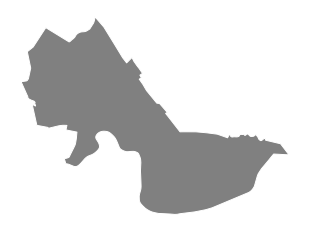

In [41]:
gdf = ox.geocode_to_gdf(place)
gdf_proj = ox.project_gdf(gdf)
ax = gdf_proj.plot(fc="gray", ec="w")
_ = ax.axis("off")

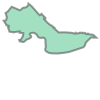

In [50]:
cambridge_b=gdf.loc[0,'geometry']
cambridge_b

In [42]:
gdf.to_file('./data/cambridge-boundary')

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [45]:
from shapely.geometry import Point  #Polygon
import pandas as pd

In [53]:
demand_raw = pd.read_csv("./input_data/user_trips_0.csv")
demand_raw

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time
0,176,2019-10-07 00:00:01.5740,2019-10-07 00:02:57.8570,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,-71.116865,79,Beacon St at Washington / Kirkland,42.378420,...,1983,1,87796,-71.113726,42.377668,17007,-71.105017,42.378432,1.0,177.0
1,193,2019-10-07 00:00:43.0660,2019-10-07 00:03:56.4360,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,19,Park Dr at Buswell St,42.347241,...,1999,2,183,-71.111674,42.350137,1384,-71.104996,42.347869,43.0,236.0
2,159,2019-10-07 00:01:29.1760,2019-10-07 00:04:08.3340,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,1999,1,180997,-71.121202,42.350776,175311,-71.122811,42.350820,89.0,248.0
3,540,2019-10-07 00:01:30.6650,2019-10-07 00:10:31.6250,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,...,1969,0,201,-71.103059,42.338554,259390,-71.084691,42.336693,90.0,631.0
4,531,2019-10-07 00:01:30.8390,2019-10-07 00:10:22.4090,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,...,1969,0,202657,-71.099701,42.338420,248527,-71.086064,42.336684,90.0,622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62187,1074,2019-10-13 23:58:29.5130,2019-10-14 00:16:24.0190,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619,37,New Balance - 20 Guest St,42.357329,...,1989,1,259759,-71.103671,42.340555,62890,-71.146244,42.355139,604709.0,605784.0
62188,384,2019-10-13 23:58:30.8800,2019-10-14 00:04:55.5750,177,University Park,42.362648,-71.100061,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,...,1996,1,225354,-71.102718,42.363217,32375,-71.111086,42.356037,604710.0,605095.0
62189,502,2019-10-13 23:58:37.6720,2019-10-14 00:07:00.3150,52,Newbury St at Hereford St,42.348717,-71.085954,122,Burlington Ave at Brookline Ave,42.345733,...,1985,1,257268,-71.085335,42.346976,162379,-71.102816,42.346085,604717.0,605220.0
62190,311,2019-10-13 23:59:29.5320,2019-10-14 00:04:41.2130,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,66,Allston Green District - Griggs St at Commonwe...,42.349225,...,1997,1,224577,-71.118932,42.350876,185148,-71.135520,42.350418,604769.0,605081.0


In [55]:
# add new column to df
demand_raw['withinC'] = ""

#Determine if it is inside or not
startwithinClist = []
for lon,lat in zip(demand_raw['start_lon'],demand_raw['start_lat']):
    pt = Point(lon, lat)
    startwithinC = pt.within(cambridge_b)
    #print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_raw['withinC'] = startwithinClist

In [57]:
# select points with start within Cambridge, assign to `demand_start_within` dataframe
demand_start_within = demand_raw[demand_raw.withinC==True]
demand_start_within

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,startwithinC,withinC
0,176,2019-10-07 00:00:01.5740,2019-10-07 00:02:57.8570,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,-71.116865,79,Beacon St at Washington / Kirkland,42.378420,...,87796,-71.113726,42.377668,17007,-71.105017,42.378432,1.0,177.0,,True
9,597,2019-10-07 00:02:58.3520,2019-10-07 00:12:55.7150,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,361,Deerfield St at Commonwealth Ave,42.349244,...,4347,-71.090572,42.361620,1320,-71.098889,42.349996,178.0,775.0,,True
13,552,2019-10-07 00:06:52.1970,2019-10-07 00:16:05.0870,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,67,MIT at Mass Ave / Amherst St,42.358100,...,225842,-71.115025,42.370528,201826,-71.094033,42.360384,412.0,965.0,,True
15,240,2019-10-07 00:07:25.9850,2019-10-07 00:11:26.2400,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,67,MIT at Mass Ave / Amherst St,42.358100,...,161771,-71.104613,42.363118,245937,-71.093978,42.358376,445.0,686.0,,True
16,828,2019-10-07 00:09:13.4160,2019-10-07 00:23:01.9710,381,Inman Square at Springfield St.,42.374384,-71.100157,115,Porter Square Station,42.387995,...,117488,-71.100734,42.371848,59022,-71.117094,42.389462,553.0,1381.0,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62178,985,2019-10-13 23:53:53.2520,2019-10-14 00:10:18.8000,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,17,Soldiers Field Park - 111 Western Ave,42.364263,...,260509,-71.092602,42.365204,219120,-71.118634,42.361798,604433.0,605418.0,,True
62181,458,2019-10-13 23:54:51.1120,2019-10-14 00:02:29.6070,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,...,257908,-71.091543,42.360223,85602,-71.105831,42.359954,604491.0,604949.0,,True
62182,306,2019-10-13 23:56:00.1740,2019-10-14 00:01:07.0980,178,MIT Pacific St at Purrington St,42.359573,-71.101295,107,Ames St at Main St,42.362500,...,85678,-71.101442,42.358791,153926,-71.088769,42.364947,604560.0,604867.0,,True
62185,459,2019-10-13 23:57:11.2610,2019-10-14 00:04:50.4560,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,...,201822,-71.089857,42.360705,119326,-71.102440,42.357701,604631.0,605090.0,,True


In [59]:
# add new column to df
demand_start_within['withinCend'] = ""

#Determine if it is inside or not
endwithinClist = []
for lon,lat in zip(demand_start_within['target_lon'],demand_start_within['target_lat']):
    pt = Point(lon, lat)
    endwithinC = pt.within(cambridge_b)
    #print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within['withinCend'] = endwithinClist

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [60]:
# select points with start within Cambridge, assign to `demand_start_within` dataframe
demand_cambridge= demand_start_within[demand_start_within.withinCend==True]
demand_cambridge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,startwithinC,withinC,withinCend
13,552,2019-10-07 00:06:52.1970,2019-10-07 00:16:05.0870,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,67,MIT at Mass Ave / Amherst St,42.358100,...,-71.115025,42.370528,201826,-71.094033,42.360384,412.0,965.0,,True,True
15,240,2019-10-07 00:07:25.9850,2019-10-07 00:11:26.2400,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,67,MIT at Mass Ave / Amherst St,42.358100,...,-71.104613,42.363118,245937,-71.093978,42.358376,445.0,686.0,,True,True
19,4217,2019-10-07 00:11:19.1750,2019-10-07 01:21:36.4020,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,189,Kendall T,42.362428,...,-71.089026,42.364289,203475,-71.085133,42.364351,679.0,4896.0,,True,True
20,799,2019-10-07 00:11:37.2620,2019-10-07 00:24:56.6760,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,-71.094771,42.359049,63401,-71.108094,42.374189,697.0,1496.0,,True,True
21,785,2019-10-07 00:11:47.9830,2019-10-07 00:24:53.6750,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,-71.092071,42.359761,6748,-71.112617,42.371169,707.0,1493.0,,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,255,2019-10-13 23:52:34.8600,2019-10-13 23:56:50.6850,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,178,MIT Pacific St at Purrington St,42.359573,...,-71.093517,42.358256,165701,-71.101976,42.361763,604354.0,604610.0,,True,True
62181,458,2019-10-13 23:54:51.1120,2019-10-14 00:02:29.6070,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,...,-71.091543,42.360223,85602,-71.105831,42.359954,604491.0,604949.0,,True,True
62182,306,2019-10-13 23:56:00.1740,2019-10-14 00:01:07.0980,178,MIT Pacific St at Purrington St,42.359573,-71.101295,107,Ames St at Main St,42.362500,...,-71.101442,42.358791,153926,-71.088769,42.364947,604560.0,604867.0,,True,True
62185,459,2019-10-13 23:57:11.2610,2019-10-14 00:04:50.4560,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,...,-71.089857,42.360705,119326,-71.102440,42.357701,604631.0,605090.0,,True,True


In [65]:
# DATE FILTER
start_date = "2019-10-12 00:00:00"
end_date = "2019-10-13 00:00:00"
demand_cambridge = demand_cambridge[demand_cambridge["starttime"].between(start_date, end_date)]

In [66]:
demand_cambridge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,startwithinC,withinC,withinCend
46344,780,2019-10-12 00:04:16.2290,2019-10-12 00:17:17.1730,110,Harvard University Gund Hall at Quincy St / Ki...,42.376369,-71.114025,195,Child St at North St,42.371505,...,-71.114297,42.376962,101602,-71.069626,42.370257,432256.0,433037.0,,True,True
46347,607,2019-10-12 00:06:41.3590,2019-10-12 00:16:48.8690,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,378,191 Beacon St,42.380323,...,-71.119092,42.373454,15320,-71.111959,42.380158,432401.0,433008.0,,True,True
46350,399,2019-10-12 00:13:43.0320,2019-10-12 00:20:22.2090,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,...,-71.103942,42.362618,102897,-71.099089,42.371193,432823.0,433222.0,,True,True
46356,1286,2019-10-12 00:22:05.2650,2019-10-12 00:43:31.6530,104,Harvard University Radcliffe Quadrangle at She...,42.380287,-71.125107,381,Inman Square at Springfield St.,42.374384,...,-71.122707,42.381831,87930,-71.103087,42.373230,433325.0,434611.0,,True,True
46358,266,2019-10-12 00:27:08.2650,2019-10-12 00:31:35.0010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,97,Harvard University River Houses at DeWolfe St ...,42.369190,...,-71.121979,42.375460,96622,-71.116454,42.370049,433628.0,433895.0,,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52821,243,2019-10-12 23:51:09.0340,2019-10-12 23:55:12.2260,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,...,-71.113790,42.371106,59818,-71.119258,42.376697,517869.0,518112.0,,True,True
52822,107,2019-10-12 23:51:20.6290,2019-10-12 23:53:08.3420,178,MIT Pacific St at Purrington St,42.359573,-71.101295,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,...,-71.100506,42.358580,161417,-71.104468,42.359425,517880.0,517988.0,,True,True
52828,413,2019-10-12 23:55:19.3900,2019-10-13 00:02:12.9360,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,...,-71.114190,42.370217,6462,-71.114799,42.378572,518119.0,518532.0,,True,True
52834,526,2019-10-12 23:58:04.7220,2019-10-13 00:06:51.4320,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,139,Dana Park,42.361780,...,-71.119992,42.373170,257275,-71.110613,42.363111,518284.0,518811.0,,True,True


In [67]:
demand_cambridge.to_csv("./data/demand_cambridge_oct12.csv", index=False)